# Homework 7: Building a Classifier
## IEOR 135/290, Data-X: Applied Data Ventures
**Author:** Sudarshan Gopalakrishnan | UC Berkeley, B.S. EECS'21 (in collaboration with Ikhlaq Sidhu). Updated Fall 2020 by Johann Schleier-Smith.

**Student** Lilit Petrosyan

In [2]:
!pip install xgboost

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import sklearn

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, KBinsDiscretizer, FunctionTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

import xgboost as xgb

# Objective
The purpose of this homework is to walk you through the data science cycle towards building a classical machine learning model.

In this homework, you will do the following:
* Explore the provided dataset
* Develop visualizations
* Formulate the hypothesis
* Clean and reformat the dataset to help you build a predictive model
* Develop features
* Build a predictive model

You are working with CalBank to build a classifier that will help them determine whether a loan profile is likely to be Fully Paid or Charged Off (i.e. written off given under the assumption that it won't be paid back).

In [4]:
data = pd.read_csv("hw_data.csv")
data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


# Part 1: Data Cleaning
In this part, we will guide you through cleaning the dataset and prepare it for data exploration.

### **Question 1**: What are some potential problems with the above dataset? 

Some potential problems include typos, missing information, and inaccurate information.

### **Question 2**: Several columns have missing data. Discuss how you would deal with missing data in each column, implement the changes and save it in the variable 'data_clean'

* **Loan ID:** Drop row
* **Customer ID:** Drop row
* **Loan Status:** Drop row
* **Current Loan Amount:** Median imputation, drop values greater than $1,000,000
* **Term:** Drop row
* **Credit Score:** Median imputation, drop values greater than 850
* **Annual Income:** Median imputation
* **Years in current job:** Drop row
* **Home Ownership:** Drop row
* **Purpose:** Drop row
* **Monthly Debt:** Median imputation
* **Years of Credit History:** Median imputation
* **Number of Credit Problems:** Median imputation
* **Current Credit Balance:** Median imputation
* **Maximum Open Credit:** Median imputation
* **Bankruptcies:** Median imputation
* **Tax Liens:** Median imputation
<br>Note: Removed rows with all values missing

In [5]:
# Do your data cleaning here
# --------------------------------------
data_clean = data.dropna(axis = 0, how = "all")
data_clean = data_clean.drop_duplicates()
fl_col = data_clean.select_dtypes(include=['float64']).columns
for i in fl_col:
    data_clean.loc[:, i] = data_clean[i].replace(np.nan, data_clean[i].median())
data_clean = data_clean.dropna()
data_clean = data_clean[data_clean["Credit Score"] <= 850]
data_clean = data_clean[data_clean["Current Loan Amount"] < 1000000]

<!--
BEGIN QUESTION
name: q2a_cleaning_any_nan
manual: false
points: 1
-->

In [6]:
grader.check("q2a_cleaning_any_nan")

All tests passed!

<!--
BEGIN QUESTION
name: q2b_cleaning_duplicate_rows
manual: false
points: 1
-->

In [7]:
grader.check("q2b_cleaning_duplicate_rows")

All tests passed!

<!--
BEGIN QUESTION
name: q2c_cleaning_credit_score
manual: false
points: 1
-->

In [8]:
grader.check("q2c_cleaning_credit_score")

All tests passed!

<!--
BEGIN QUESTION
name: q2d_cleaning_loan_amount
manual: false
points: 1
-->

In [9]:
grader.check("q2d_cleaning_loan_amount")

All tests passed!

<!--
BEGIN QUESTION
name: q2e_cleaning_columns
manual: false
points: 1
-->

In [10]:
grader.check("q2e_cleaning_columns")

All tests passed!

# Part 2: Data Exploration

### **Question 3:** Create three interesting visualizations that will help you build a hypothesis.

Feel free to create cells to analyse the data and build your understanding. Use the questions below to help you get started:
* What are some numerical indicators that point towards a charged-off loan?
* How does the purpose of the loan impact the loan application? 
* How does the house ownership status impact the loan application?

Once you analyse the dataset, create your visualizations. This part will be graded manually.

**Visualization 1**

In [11]:
credit_score_charged = data_clean[data_clean["Loan Status"] == "Charged Off"]["Credit Score"]
credit_score_paid = data_clean[data_clean["Loan Status"] == "Fully Paid"]["Credit Score"]

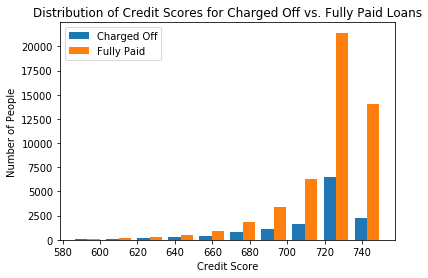

In [12]:
plt.hist([credit_score_charged, credit_score_paid], label = ["Charged Off", "Fully Paid"], density = False)
plt.legend()
plt.xlabel("Credit Score")
plt.ylabel("Number of People")
plt.title("Distribution of Credit Scores for Charged Off vs. Fully Paid Loans");

**What insights does this visualization offer?**

People with higher credit scores are more likely to fully pay their loans than charge off.

-------------------

**Visualization 2**

In [13]:
loan_amount_charged = data_clean[data_clean["Loan Status"] == "Charged Off"]["Current Loan Amount"]
loan_amount_paid = data_clean[data_clean["Loan Status"] == "Fully Paid"]["Current Loan Amount"]

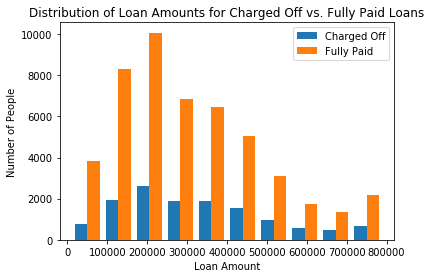

In [14]:
plt.hist([loan_amount_charged, loan_amount_paid], label = ["Charged Off", "Fully Paid"], density = False)
plt.legend()
plt.xlabel("Loan Amount")
plt.ylabel("Number of People")
plt.title("Distribution of Loan Amounts for Charged Off vs. Fully Paid Loans");

**What insights does this visualization offer?**

At lower loan amounts, more people full pay off their loans.

------------------------

**Visualization 3**

In [15]:
term_short = data_clean[data_clean["Term"] == "Short Term"]["Loan Status"]
term_long = data_clean[data_clean["Term"] == "Long Term"]["Loan Status"]

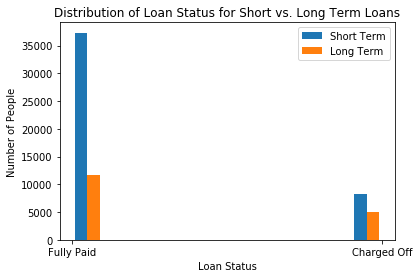

In [16]:
plt.hist([term_short, term_long], label = ["Short Term", "Long Term"], density = False)
plt.legend()
plt.xlabel("Loan Status")
plt.ylabel("Number of People")
plt.title("Distribution of Loan Status for Short vs. Long Term Loans");

**What insights does this visualization offer?**

Short term loans are more likely to be fully paid off.

### **Question 4:** What is your hypothesis?

I belive that Current Loan Amount, Credit Score, Annual Income, Monthly Debt, Term, Years in current job are indicators of loan status. Additionally, bankruptcies and tax liens are irrelevant and thus should be discarded.

### **Question 5:** Analyze the dataset and make an inference about your hypothesis.

In [17]:
# Write the code for your analysis here
data_clean.drop(columns = ["Bankruptcies", "Tax Liens"], inplace = True)

*Enter your conclusion here*

# Part 3: Preprocessing and Feature Engineering

 The objective you are working towards is building a classifier that will allow you to classify whether a loan will be fully paid or charged off using some or all of the following pieces of data: 
* Loan ID
* Customer ID
* Loan Status
* Current Loan Amount
* Term
* Credit Score
* Annual Income
* Years in current job
* Home Ownership
* Purpose
* Monthly Debt
* Years of Credit History
* Months since last delinquent
* Number of Open Accounts
* Number of Credit Problems
* Current Credit Balance
* Maximum Open Credit
* Bankruptcies
* Tax Liens

This notebook contains a reference implementation that uses *Number of Open Accounts*, *Monthly Debt*, *Bankruptcies*, and *Home Ownership* to predict *Loan Status*. These features are not sufficient to achieve the accuracy threshold required for this assignment. You should use this code as an example and a scaffold for your own solution. 

### **Question 6:** Which metrics do you think are good indicators of loan status?  Create a new Dataframe preprocessed_data with all the columns (at least 4) that you determine to be good indicators of loan status.

In [18]:
# Modify the line below to select your columns
selected_columns = ["Current Loan Amount", "Credit Score", "Annual Income", "Monthly Debt", "Term", "Years in current job"]

def select_columns():
    ft = FunctionTransformer(lambda x: x[selected_columns])
    ft.get_feature_names = lambda: selected_columns
    return ft

In [19]:
# Review the feature building pipeline to ensure that it looks as you expect
select_pipeline = make_pipeline(select_columns())
select_pipeline.fit_transform(data_clean).head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Term,Years in current job
0,445412.0,709.0,1167493.0,5214.74,Short Term,8 years
1,262328.0,729.0,1175644.0,33295.98,Short Term,10+ years
3,347666.0,721.0,806949.0,8741.90,Long Term,3 years
4,176220.0,729.0,1175644.0,20639.70,Short Term,5 years
5,217646.0,730.0,1184194.0,10855.08,Short Term,< 1 year


<!--
BEGIN QUESTION
name: q6a_select_columns
manual: false
points: 1
-->

In [20]:
grader.check("q6a_select_columns")

All tests passed!

### **Question 7:** Are the numerical features useful for prediction in their current form? Modify the code below to ensure the numerical features are formatted suitably.

In [21]:
def numerical_transforms():
    return ColumnTransformer([
        # Edit this section so that it includes your chosen features
        ('Current Loan Amount', StandardScaler(), ['Current Loan Amount']),
        ('Credit Score', StandardScaler(), ['Credit Score']),
        ('Annual Income', StandardScaler(), ['Annual Income']),
        ('Monthly Debt', StandardScaler(), ['Monthly Debt'])],
        remainder='passthrough')

# Review the feature building pipeline to ensure that it looks as you expect
num_pipeline = make_pipeline(select_columns(), numerical_transforms())
pd.DataFrame(num_pipeline.fit_transform(data_clean), columns=selected_columns).head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Term,Years in current job
0,0.729541,-0.476931,-0.21763,-1.09593,Short Term,8 years
1,-0.264829,0.330407,-0.207419,1.19952,Short Term,10+ years
2,0.19866,0.00747168,-0.669336,-0.807608,Long Term,3 years
3,-0.732501,0.330407,-0.207419,0.164955,Short Term,5 years
4,-0.507507,0.370774,-0.196707,-0.63487,Short Term,< 1 year


<!--
BEGIN QUESTION
name: q7a_numerical_transform_columns
manual: false
points: 1
-->

In [22]:
grader.check("q7a_numerical_transform_columns")

All tests passed!

<!--
BEGIN QUESTION
name: q7b_numerical_transform_rows
manual: false
points: 1
-->

In [23]:
grader.check("q7b_numerical_transform_rows")

All tests passed!

### **Question 8:** Convert all your non-numerical features to numerical form that you believe would be useful for your model.

In [24]:
def categorical_transforms():
    # Edit this ColumnTransformer to account for your chosen features
    return ColumnTransformer([
        ('Term', OneHotEncoder(drop='if_binary', sparse=False), [list(selected_columns).index('Term')]),
        ('Years in current job', OneHotEncoder(drop='first', sparse=False), [list(selected_columns).index('Years in current job')])],
        remainder='passthrough')

full_pipeline = make_pipeline(select_columns(), numerical_transforms(), categorical_transforms())

# Review the feature building pipeline to ensure that it looks as you expect
full_pipeline.fit_transform(data_clean)[:5]


array([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,
        0.7295406457428262, -0.47693099505648545, -0.21763045197379124,
        -1.0959296224332673],
       [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        -0.2648292091325205, 0.3304067962232487, -0.2074185159353137,
        1.1995197043170114],
       [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.19866041680613247, 0.007471679711355022, -0.669336042337776,
        -0.8076084141340428],
       [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        -0.7325008760373639, 0.3304067962232487, -0.2074185159353137,
        0.1649553686550884],
       [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,
        -0.5075070720563164, 0.37077368578723535, -0.1967066949159317,
        -0.634870400844667]], dtype=object)

<!--
BEGIN QUESTION
name: q8a_categorical_transform_rows
manual: false
points: 1
-->

In [25]:
grader.check("q8a_categorical_transform_rows")

All tests passed!

# Part 4: Model Building

We are now ready to build a model. We tranform the cleaned data from Part 1 using the features defined in Part 3. Then we split it into training, validation, and test data sets. Before fitting, we balance the data by resampling to achieve an equal number of positive and negative outcomes in each data set.

In [26]:
full_pipeline.fit(data_clean)
X = full_pipeline.transform(data_clean)
y = data_clean['Loan Status'] == 'Fully Paid'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.34, random_state=43)

def upsample(X, y):
    each_ct = len(y[y])  # y[y] = True values from y
    assert len(y[~y]) < each_ct   # y[~y] = False values from y
    X0, y0 = sklearn.utils.resample(X[~y], y[~y], replace=True, n_samples=each_ct)
    X1, y1 = X[y], y[y]
    return np.concatenate([X0, X1]), np.concatenate([y0, y1])

X_train, y_train = upsample(X_train, y_train)
X_validation, y_validation = upsample(X_validation, y_validation)
X_test, y_test = upsample(X_test, y_test)

### **Question 9:** Implement and compare three of the following classification models and determine what works best for the problem and your choice of features.
1. Logistic Regression
2. K-Nearest Neighbors (KNN) 
3. Support Vector Machines (SVM)
4. Perceptron
5. XGBoost
6. Random Forest

Be sure to use:
* X_train, y_train to train the models in Question 9a, 9b,..., 9f
* X_validation, y_validation to validate the models in Question 9a, 9b,..., 9f
* X_test, y_test to test the best model in Question 10

#### Question 9a: Logistic Regression

In [27]:

logreg = LogisticRegression(max_iter=1000)                                # instantiate
logreg.fit(X_train, y_train)                                 
y_prediction = logreg.predict(X_validation)                               # predict
acc_logreg = sum(y_prediction == y_validation)/len(y_validation)*100      # evaluate

print('Logistic Regression validation accuracy:', str(round(acc_logreg,2)),'%')

Logistic Regression validation accuracy: 58.01 %


#### Question 9b: KNN

In [28]:
# Choose at least for models to implement - your code here
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
y_prediction = neigh.predict(X_validation)
acc_knn = sum(y_prediction == y_validation)/len(y_validation)*100

print('KNN validation accuracy:', str(round(acc_knn,2)),'%')

KNN validation accuracy: 53.86 %


### **Question 10:** Which model has the best performance?

In [33]:
best_model = logreg

In [34]:
test_score = best_model.score(X_test, y_test)

print("The test accuracy of your best model is", str(round(test_score*100,2)))

The test accuracy of your best model is 57.3


<!--
BEGIN QUESTION
name: q10a_test_result
manual: false
points: 5
-->

In [35]:
grader.check("q10a_test_result")

All tests passed!

### **Question 11:** How does the model perform on reference data?

We have included an additional evaluation data set containing values that we have have cleaned for you. Run your preprocessing and feature building pipeline using these features. If you are having trouble getting good results on this part, or on Question 10, go back to your data cleaning.

In [36]:
# Compare to an evaluation with the reference solution.
eval_data = pd.read_csv("hw_eval.csv")

X_eval = full_pipeline.transform(eval_data)
y_eval = eval_data['Loan Status'] == 'Fully Paid'

eval_score = best_model.score(X_eval, y_eval)

print("The accuracy of your best model on reference cleaned data", str(round(eval_score*100,2)))

The accuracy of your best model on reference cleaned data 59.91


<!--
BEGIN QUESTION
name: q11a_evalation_result
manual: false
points: 5
-->

In [37]:
grader.check("q11a_evalation_result")

All tests passed!